<a href="https://colab.research.google.com/github/oleksandr-maksymikhin/mit-ai-course/blob/main/AI_3_Recitation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering**

Clustering is an unsupervised learning technique used in descriptive analytics to group similar data points together. Unlike classification and regression(supervised learning), clustering does not have predefined labels or targets. Instead, the algorithm discovers patterns in the data based on similarities. Clustering is commonly used in customer segmentation, anomaly detection, and exploratory data analysis.

# **DATA OVERVIEW:**
We utilize the Heart Failure Clinical Records Data Set (Heart Failure Clinical Records [Dataset]. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5Z89R.), a dataset that contains the medical records of 299 patients who had heart failure, collected during their follow-up period.
The original dataset, which you will find in the file heart_failure.csv, consists of about 300 data points and the following 13 features:
- Age: age of the patient (years).
- Anaemia: decrease of red blood cells or hemoglobin (boolean).
- High blood pressure: if the patient has hypertension (boolean).
- Creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L).
- Diabetes: if the patient has diabetes (boolean).
- Ejection fraction: percentage of blood leaving the heart at each contraction (percentage).
- Platelets: platelets in the blood (kiloplatelets/mL).
- Sex: woman or man (binary).
- Serum creatinine: level of serum creatinine in the blood (mg/dL).
- Serum sodium: level of serum sodium in the blood (mEq/L).
- Smoking: if the patient smokes or not (boolean).
- Time: follow-up period (days).
- Death event: if the patient deceased during the follow-up period (boolean).

# **GOAL:**
To better understand the factors that are critical for different types of heart failure patients, we are interested
in clustering our data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import pairwise_distances, accuracy_score

# Read in the data file:
data = pd.read_csv("heart_failure.csv")

# Basic data exploration:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None


In [ ]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


Let's take a look at the data

In [ ]:
# Describe statistics
data.describe().loc[['max', 'min', 'mean', '50%', 'std']]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767


### Why is normalizing important?

Clustering algorithms rely on distance measures, such as Euclidean distance, to group similar data points together. However, when features have different scales, those with larger ranges can dominate distance calculations, leading to biased clustering results. Normalization ensures that all features contribute equally to the clustering process.


In [ ]:
# We define indices to easily access to categorical (binary)
# and numerical features
feature_names = data.columns
cat_feature_indices = [1, 3, 5, 9, 10, 12]
num_feature_indices = [0, 2, 4, 6, 7, 8, 11];

# Standardize numerical variables
data_num = data.iloc[:, num_feature_indices]
scaler = MinMaxScaler()
data_num_stand_mat = scaler.fit_transform(data_num)
data_num = pd.DataFrame(data_num_stand_mat, columns=data_num.columns)

# Binary features as they are
data_bin = data.iloc[:, cat_feature_indices]

# Append data
data_processed = pd.concat([data_num, data_bin], axis=1)


# i. Hierarchical Clustering

 Hierarchical clustering builds a hierarchy of clusters by iteratively merging or splitting them. In the agglomerative approach (bottom-up), each data point starts as its own cluster, and the algorithm successively merges the closest clusters until only one remains. The divisive approach (top-down) starts with one large cluster and recursively splits it into smaller clusters. The results are represented in a dendrogram, which helps determine the optimal number of clusters, which is not needed beforehand.

In [ ]:
# Create the distance matrix. This step takes some time to run. The reason why
# is because pairwise_distances() creates a matrix where each entry corresponds
# to the distance between two pairs of observation.
print("Creating distance matrix")
dataDist = pairwise_distances(data_processed, metric="euclidean")

# Perform hierarchical clustering
dataHierClust = linkage(dataDist, method="ward")

Creating distance matrix


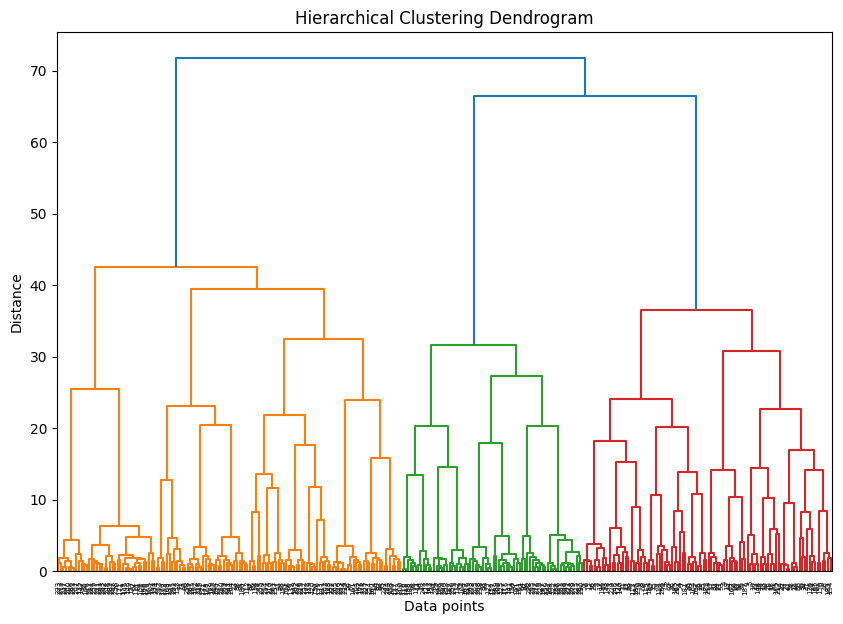

In [ ]:
# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(dataHierClust)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.show()

What is the right number of clusters? There is no right or wrong answer here. Keep in mind how the the algorithm works: every point starts in its own cluster, and we have a distance threshold that we increase starting from 0. As we increase the threshold, we check for every two clusters whether the distance between them is sufficiently close as determined by the threshold. If it is, we merge the two clusters

The height of the dendrogram corresponds to this threshold, and heights at which the dendrogram branches are critical thresholds, where two clusters become one (if you look at it from the bottom to the top) or alternatively one cluster splits into two (if you look at it from the top to the bottom).

The notion of "wiggle room" is important-- how much the threshold changes before one of the clusters breaks. The "wiggle room" at a given level of the tree gives you a sense of how "robust" the clusters are at that level; if there is a lot of wiggle room, it means that that threshold must increase by a lot before two clusters merge together. This would suggest that the clusters are highly separated from each other (and make sense as clusters).

On the other hand, a small amount of wiggle room suggests that the clusters are not very robust and are not strongly separated from each other (increasing the threshold by a small amount causes two clusters to merge together; this means that those two clusters were not that far from each other).


Ideally, we would like to select a number of clusters that has a good amount of wiggle room on the dendrogram. However, depending on the application, we may want to use a larger number of clusters. Here, three clusters would be reasonable, but for demonstration purposes let's go with four clusters.

In [ ]:
# Cut the dendrogram into 4 clusters
hierGroups = fcluster(dataHierClust, t=4, criterion="maxclust")
print(hierGroups)

# Number of points in each cluster
print(pd.Series(hierGroups).value_counts())

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 3 4 4 2 4 4 4 4 4 4 4 4 4 3 4 4 4
 4 2 4 4 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 2 2 4 4 4 4 1 4 3 4 4 4 4 4 1 2 4 2
 4 4 2 2 2 3 3 1 4 2 4 1 2 2 2 2 2 2 3 4 3 2 2 3 3 3 2 2 1 1 3 4 1 2 1 2 4
 1 2 4 2 3 3 3 3 4 2 3 3 3 4 3 4 3 2 2 2 2 3 2 1 1 3 2 3 2 4 3 3 3 4 1 1 1
 4 2 4 2 2 2 3 2 3 1 2 2 2 2 2 4 4 4 1 4 3 3 2 1 2 2 2 2 1 3 2 1 2 4 4 4 4
 4 4 4 3 3 2 3 2 2 4 4 3 3 3 2 2 2 2 2 2 3 3 1 3 3 2 2 1 4 2 2 3 4 2 3 4 1
 2 1 2 3 2 2 3 3 4 1 2 2 2 2 2 1 3 2 3 2 1 3 2 2 4 1 1 3 3 3 2 3 2 2 3 2 2
 1 1 3 4 3 2 2 4 2 3 2 2 3 3 1 2 3 3 2 3 3 2 1 1 1 2 2 1 3 3 3 3 1 2 2 2 3
 3 1 1]
4    96
2    95
3    70
1    38
Name: count, dtype: int64


Now let's try to interpret the clusters: How can we get a sense of what the clusters mean/what they correspond to?

In [ ]:
# Individual variable averages.
# For example, we can examine what is the average age in each group:

print(data.groupby(hierGroups)['age'].mean())

1    58.184211
2    59.210526
3    58.466671
4    65.215281
Name: age, dtype: float64


In [ ]:
print(data.groupby(hierGroups)['high_blood_pressure'].mean())

1    0.000000
2    0.421053
3    0.371429
4    0.406250
Name: high_blood_pressure, dtype: float64


Cluster 1 contains people without high blood pressure. Is this practical? We would need to examine evey variable separately.


# ii. K-means Clustering

An alternative to hierarchical clustering is k-means clustering. Recall that k-means is different from hierarchical clustering.
1. The number of clusters is specified up front.
2. Each point is randomly assigned to one of the clusters.
3. The centroid of each cluster is computed.
4. Each point is then re-assigned to the cluster whose centroid is closest to the point.
5. The cluster centroids are re-computed, and we go back to step 4.

We terminate when the cluster assignments no longer change or we reach the maximum number of iterations.


Before starting, we need to choose the number of clusters to use. Do we always know what the best number is? How do we define it?

One way is to use the elbow method. The elbow method plots the within-cluster sum of squares (WCSS) against the number of clusters. Ideally, we want WCSS to be small, because it measures how tightly the data points in each cluster are grouped around the cluster's centroid. The optimal number of clusters is found at the "elbow point," where adding more clusters does not significantly decrease WCSS.


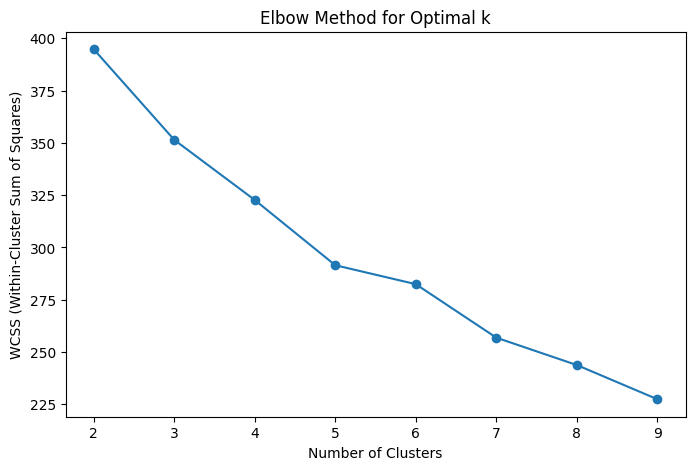

In [ ]:
### Elbow Method for Finding the Optimal k
cluster_range = range(2, 10)
wcss = []
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=88)
    kmeans.fit(data_processed)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.show()

We observe that the sharpest drop happens between 2 to 5 clusters, but after 5 clusters, the decrease in WCSS slows down. So, 5 seems like a reasonable number of clusters to use. For simplicity, we will go with 4 for now.

In [ ]:
# Set the seed for reproducibility
np.random.seed(88)

# Run the k-means algorithm for 4 clusters
dataKMeans = KMeans(n_clusters=4, random_state=88).fit(data_processed)
kmeansGroups = dataKMeans.labels_

# Number of points in each cluster
print(pd.Series(kmeansGroups).value_counts())

1    99
3    80
0    61
2    59
Name: count, dtype: int64


In [ ]:
# Break the data into clusters
KmeansClusters = [data[kmeansGroups == i] for i in range(4)]

Note -- kmeans and hierarchical clustering are trying to accomplish similar things, but are not the same. In particular, the cluster assignments you get from k-means clustering will in general *not* be identical as the ones from hierarchical clustering, though they may be similar.


In [ ]:
# Individual variable averages.

print(data.groupby(kmeansGroups)['age'].mean())

0    58.590164
1    58.360273
2    64.689271
3    62.762500
Name: age, dtype: float64


In [ ]:
print(data.groupby(kmeansGroups)['high_blood_pressure'].mean())

0    0.065574
1    0.212121
2    0.000000
3    1.000000
Name: high_blood_pressure, dtype: float64


Note that the order of the clusters is not meaningful.

# iii.Interpretable clustering

Interpretable clustering, such as fitting a decision tree on clusters, is valuable because of the transparency: It provides clear, understandable rules for how clusters are formed, making it easier for domain experts (e.g., doctors) to trust and use the model.


How do we perform interpretable clustering?

- Fit a Decision Tree: Train a decision tree on the original features, using the cluster labels as the target variable.

- Interpret the Tree: Analyze the tree structure to understand how features split the data into clusters.

- Validate the Model: Evaluate the tree's performance using metrics like accuracy or Gini impurity to ensure it accurately represents the clusters.

In [ ]:
kmeansGroups

array([3, 2, 2, 2, 1, 3, 2, 0, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 3, 1, 3, 1,
       3, 1, 1, 0, 3, 3, 2, 0, 3, 2, 1, 1, 3, 2, 2, 1, 1, 1, 3, 3, 3, 3,
       1, 0, 3, 3, 3, 2, 3, 3, 1, 1, 1, 2, 0, 0, 3, 3, 3, 3, 0, 2, 1, 2,
       1, 2, 2, 2, 0, 0, 2, 0, 2, 2, 3, 1, 3, 3, 1, 0, 1, 3, 1, 2, 3, 3,
       3, 3, 0, 1, 1, 2, 1, 3, 3, 1, 1, 1, 2, 3, 0, 0, 3, 3, 2, 1, 0, 0,
       2, 0, 1, 2, 3, 1, 1, 1, 1, 2, 3, 1, 1, 3, 2, 1, 1, 1, 3, 1, 3, 1,
       3, 3, 0, 2, 1, 2, 1, 3, 2, 1, 1, 3, 3, 0, 0, 2, 2, 3, 3, 3, 3, 0,
       3, 1, 1, 0, 2, 3, 3, 0, 0, 1, 2, 1, 0, 2, 1, 3, 0, 0, 3, 2, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 3, 2, 2, 2, 1, 1, 3, 1, 1, 1, 0, 3, 2, 1, 1,
       1, 0, 2, 3, 3, 3, 0, 1, 1, 2, 1, 1, 0, 3, 0, 1, 3, 3, 3, 3, 1, 1,
       2, 0, 0, 2, 1, 1, 0, 3, 1, 1, 2, 0, 2, 0, 0, 3, 3, 2, 1, 0, 1, 0,
       0, 3, 1, 1, 2, 2, 0, 1, 3, 1, 3, 1, 3, 3, 1, 3, 1, 0, 2, 1, 2, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 2, 0, 3, 1, 1, 1, 1, 1, 0, 0, 0, 2, 1,
       2, 1, 1, 1, 1, 2, 0, 0, 0, 1, 1, 0, 0], dtyp

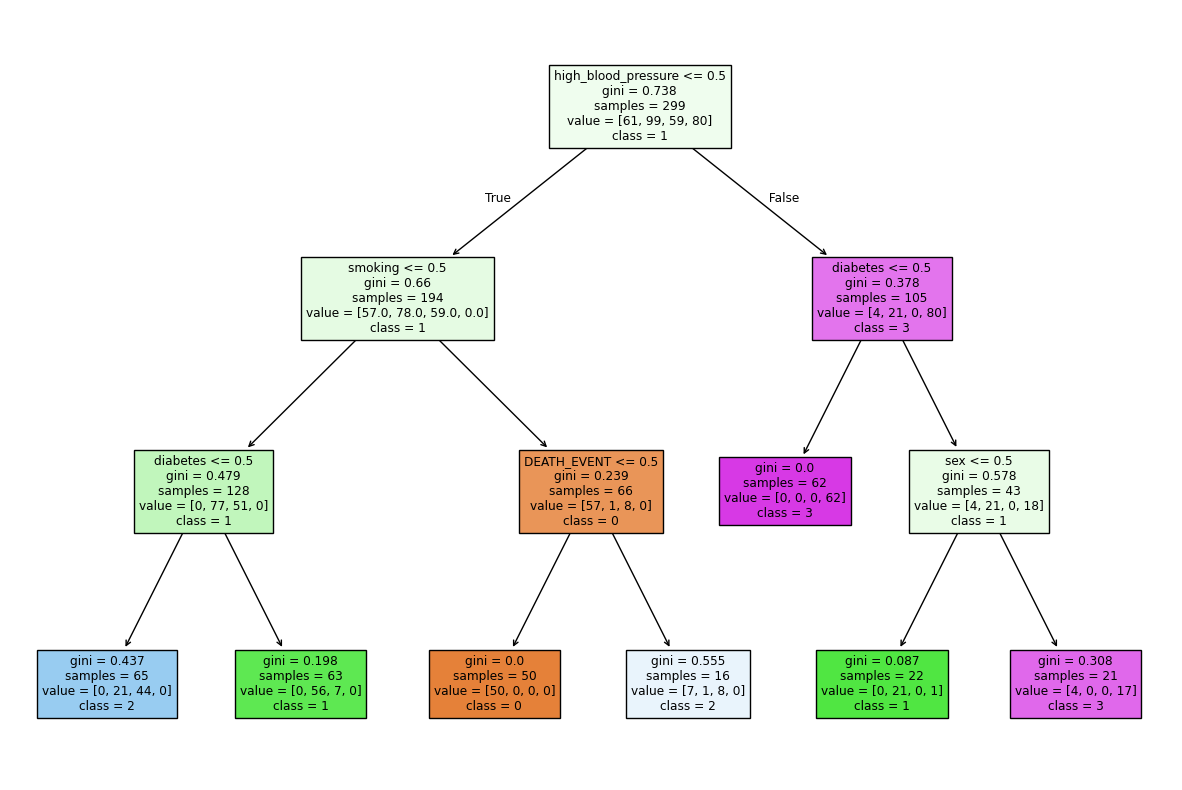

In [ ]:
# Train a Decision Tree (CART)
tree = DecisionTreeClassifier(max_depth=3, random_state=42)  # Small tree for visualization
tree.fit(data, kmeansGroups)

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(tree, filled=True, feature_names=data.columns.tolist(), class_names=[str(i) for i in range(5)])
plt.show()

The decision tree splits the data into clusters based on features like high blood pressure, smoking, diabetes, sex, and DEATH_EVENT. Each leaf node represents a cluster, and the class indicates the dominant cluster label for that group. Here's a breakdown of the clusters:

- Cluster 0: Patients with no high blood pressure but who smoke. Smoking increases their risk, placing them in a higher-risk cluster.

- Cluster 1: Patients with high blood pressure and diabetes. This group is at the highest risk due to multiple comorbidities.

- Cluster 2: Patients with no high blood pressure and no diabetes. This group is likely healthier, with lower risks of complications.

- Cluster 3: Patients with high blood pressure but no diabetes. This group has moderate risk, primarily due to high blood pressure.

How good is the tree we trained? We can check its accuracy at "predicting" the correct cluster label.

In [ ]:
predicted_clusters = tree.predict(data)
accuracy = accuracy_score(kmeansGroups, predicted_clusters)

print(f"The accuracy of our CART model is: {accuracy}")

The accuracy of our CART model is: 0.862876254180602


The performance of the model, although not perfect, indicates that the tree successfully captures the different clusters.

So far, we've talked about using clustering for understanding a dataset. But what do you do when you get new data?

For example: suppose we have built k-means clusters for a set of existing patients (the "old" data). We now have a *new* set of patients. Is it possible to determine which of our existing clusters those patients belong to? YES!

To demonstrate this, let's split the data into a training and a testing data set. We'll use the training data set to come up with the clusters -- this is our "old" data. We'll then treat the second data set as "new" data. The goal is to assign each "new" observation to one of our "old" clusters.


REMEMBER: clustering is NOT a classification/prediction method. We have NO dependent variable here. We have NO way to evaluate the "accuracy" of our clusters.


# iv. Clustering "new" data

In [ ]:
# Split the data into training and testing sets
data_train, data_test = train_test_split(data_processed, test_size=0.3, random_state=88)

In [ ]:
# Run the k-means algorithm on the training set
dataKMeans_train = KMeans(n_clusters=4, random_state=88).fit(data_train.iloc[:, 1:])

In [ ]:
# Assign clusters to the test set
newClusterAssignment = dataKMeans_train.predict(data_test.iloc[:, 1:])
print(pd.Series(newClusterAssignment).value_counts())

2    28
3    25
1    21
0    16
Name: count, dtype: int64


# Conclusion

## When to Use Each Method
- **Use Hierarchical Clustering** when the number of clusters is unknown, interpretability is important, or when dealing with smaller datasets.
- **Use K-Means** when working with large datasets where efficiency is a priority, and the number of clusters is predefined.

## Interpretable Clustering
Once clusters are formed, decision trees can be trained on the cluster assignments to provide interpretability. This approach allows us to understand which features are most important in defining clusters.
